Project: Machine Learning of Salary and Demographic Factors
Name: Shaohua Feng
Supervisor:

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read in data loaded in google drive
file_path_1 = '/content/drive/My Drive/adult.data'
adult_1= pd.read_csv(file_path_1,header=None)
file_path_2 = '/content/drive/My Drive/adult.test.txt'
adult_2= pd.read_csv(file_path_2,header=None)
adult=pd.concat([adult_1, adult_2], ignore_index=True)

In [ ]:
# add column names
cols=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
adult.columns=cols
adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
# add y column to data frame. y=1 for label '>50k' and y=0 for label '<=50k'
adult['y']=np.where(adult['label']==' >50K',1,0)
adult.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [ ]:
print(adult.describe())
adult.dtypes
adult.info()

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week             y  
count    48842.000000  48842.000000  
mean        40.422382      0.160538  
std         12.391444      0.367108  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         4

In [ ]:
# explore: find factor levels
print(adult['workclass'].unique())
print(adult['occupation'].unique())
print(adult['native-country'].unique())
print(type(adult['occupation']))

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
<class 'pandas.core.series.Series'>


In [ ]:
adult['workclass']=adult['workclass'].replace(' ?',None)
adult['occupation']=adult['occupation'].replace(' ?',None)
adult['native-country']=adult['native-country'].replace(' ?',None)

In [ ]:
print(adult['occupation'].unique())
print(adult['occupation'].unique())
print(adult['occupation'].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' None
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' None
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' None
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [ ]:
# check how many missing vales in columns workclass, occupation and native-country
print(adult['workclass'].isnull().sum())
print(adult['occupation'].isnull().sum())
print(adult['native-country'].isnull().sum())

2799
2809
857


In [ ]:
# charactegorical columns
cols_cat=['workclass','fnlwgt','education','marital-status','occupation','relationship','race','sex','native-country']

for x in cols_cat:
  adult[x] = adult[x].astype('category')
  #print(x)

adult.dtypes

age                  int64
workclass         category
fnlwgt            category
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
label               object
y                    int64
dtype: object

In [ ]:
# delete missing value
adult_cleaned=adult.dropna()
print(len(adult_cleaned))

45222


In [ ]:
print("Check for NaN values:")
print(adult_cleaned.isna().any())

Check for NaN values:
age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
label             False
y                 False
dtype: bool


Grouped by workclass:
           workclass         y
4       Self-emp-inc  0.366962
0        Federal-gov  0.259078
1          Local-gov  0.196747
5   Self-emp-not-inc  0.187468
6          State-gov  0.178193
3            Private  0.146375
2       Never-worked  0.000000
7        Without-pay  0.000000

Grouped by education:
        education         y
10      Doctorate  0.515152
14    Prof-school  0.507194
12        Masters  0.360933
9       Bachelors  0.276760
8       Assoc-voc  0.175158
7      Assoc-acdm  0.165522
15   Some-college  0.127505
11        HS-grad  0.106120
2            12th  0.050228
0            10th  0.044636
5         7th-8th  0.041885
6             9th  0.035714
1            11th  0.033113
4         5th-6th  0.031434
3         1st-4th  0.024291
13      Preschool  0.000000

Grouped by marital-status:
           marital-status         y
2      Married-civ-spouse  0.299030
1       Married-AF-spouse  0.270270
0                Divorced  0.069803
6                 Widowed  0

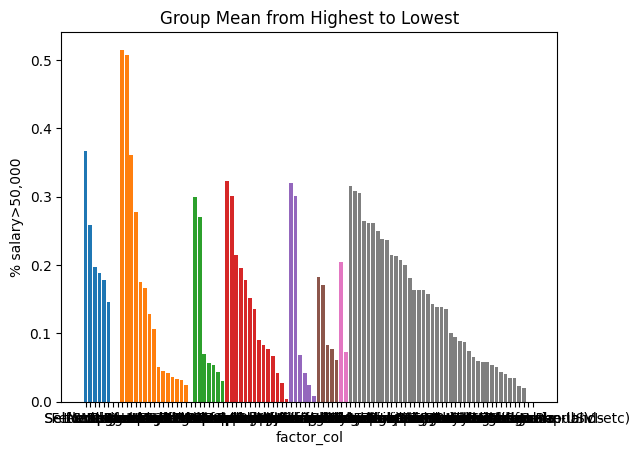

In [ ]:
# Grouped by factors
factor_cols=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

for factor_col in factor_cols:
    # Group by the current factor column and calculate the mean
    grouped_data = adult.groupby(factor_col)['y'].mean().reset_index()

    # Sort the grouped data by percentage of salary>50,000
    sorted_data = grouped_data.sort_values(by='y', ascending=False)
    # Print the results
    print(f"Grouped by {factor_col}:\n{sorted_data}\n")

    # plot the sorted data
    #plt.bar(sorted_data[factor_col], sorted_data['y'])
    #plt.xlabel(f'factor_col')
    #plt.ylabel('% salary>50,000')
    #plt.title(f'Group Mean from Highest to Lowest')
    #plt.show



##############
#grouped_df = df.groupby('Category')['Value'].mean().reset_index()

# Sort the DataFrame by mean values
#sorted_df = grouped_df.sort_values(by='Value', ascending=False)

# Plot the sorted data
#plt.bar(sorted_df['Category'], sorted_df['Value'])
#plt.xlabel('Category')
#plt.ylabel('Mean Value')
#plt.title('Group Mean from Highest to Lowest')
#plt.show()



In [ ]:
# I am very interested in the relationship between salary level and race and education combination
factor_columns = ['race', 'education']

for combination in adult.groupby(factor_columns):
    group_name = combination[0]
    group_data = combination[1]
    mean_salary = group_data['y'].mean()

    print(f"Factors: {', '.join(f'{col}={val}' for col, val in zip(factor_columns, group_name))} | Salary>50,000: {mean_salary}")


Factors: race= Amer-Indian-Eskimo, education= 10th | Salary>50,000: 0.0
Factors: race= Amer-Indian-Eskimo, education= 11th | Salary>50,000: 0.07692307692307693
Factors: race= Amer-Indian-Eskimo, education= 12th | Salary>50,000: 0.0
Factors: race= Amer-Indian-Eskimo, education= 1st-4th | Salary>50,000: 0.0
Factors: race= Amer-Indian-Eskimo, education= 5th-6th | Salary>50,000: 0.0
Factors: race= Amer-Indian-Eskimo, education= 7th-8th | Salary>50,000: 0.0
Factors: race= Amer-Indian-Eskimo, education= 9th | Salary>50,000: 0.0
Factors: race= Amer-Indian-Eskimo, education= Assoc-acdm | Salary>50,000: 0.07692307692307693
Factors: race= Amer-Indian-Eskimo, education= Assoc-voc | Salary>50,000: 0.03225806451612903
Factors: race= Amer-Indian-Eskimo, education= Bachelors | Salary>50,000: 0.27586206896551724
Factors: race= Amer-Indian-Eskimo, education= Doctorate | Salary>50,000: 0.6666666666666666
Factors: race= Amer-Indian-Eskimo, education= HS-grad | Salary>50,000: 0.0625
Factors: race= Amer-In

In [ ]:
# correlation matrix
cor_matrix = adult_cleaned.corr()
print(cor_matrix)

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.075792       0.037623      0.079683      0.059351   
fnlwgt         -0.075792  1.000000      -0.041993     -0.004110     -0.004349   
education-num   0.037623 -0.041993       1.000000      0.126907      0.081711   
capital-gain    0.079683 -0.004110       0.126907      1.000000     -0.032102   
capital-loss    0.059351 -0.004349       0.081711     -0.032102      1.000000   
hours-per-week  0.101992 -0.018679       0.146206      0.083880      0.054195   

                hours-per-week  
age                   0.101992  
fnlwgt               -0.018679  
education-num         0.146206  
capital-gain          0.083880  
capital-loss          0.054195  
hours-per-week        1.000000  


<ipython-input-43-996d41d75be3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = adult_cleaned.corr()
